In [1]:
import pandas as pd
df = pd.read_csv("promo_full.csv").drop(columns=['Unnamed: 0'])
df.head()

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_45939/1954238869.py:2: DtypeWarning: Columns (7,8,17,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("promo_full.csv").drop(columns=['Unnamed: 0'])


,file_id,chainid,subchainid,storeid,bikoretno,priceupdatedate,itemcode,isgiftitem,rewardtype,allowmultiplediscounts,...,remark,giftsitems,additionalscoupon,clubid,additionalsgiftcount,minpurchaseamount,additionalstotals,additionalsminbasketamount,minnoofitemsoffered,itemtype
0,samples_promo_full/Super-Pharm/PromoFull729017...,7290172900007,100,311,100,2022-10-03,8714789177229,0,3,1,...,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply
1,samples_promo_full/Super-Pharm/PromoFull729017...,7290172900007,100,311,100,2022-10-13,7290112490896,0,3,1,...,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply
2,samples_promo_full/Super-Pharm/PromoFull729017...,7290172900007,100,311,100,2022-10-13,7290101864127,0,3,1,...,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply
3,samples_promo_full/Super-Pharm/PromoFull729017...,7290172900007,100,311,100,2022-10-13,7290012116735,0,3,1,...,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply
4,samples_promo_full/Super-Pharm/PromoFull729017...,7290172900007,100,311,100,2022-10-13,8690637704291,0,3,1,...,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply


In [2]:
all_columns = list(df.columns)

ignore = ['bikoretno']

index = [
    'promotionupdatedate', # שעת עדכון המבצע בנוגע למוצר
    'itemcode','promotionitems', # מספר הברקוד של המצרך
    'itemtype' #  האם ברקוד פנימי
]
flag_columns = [
    'isgiftitem',
    'isweightedpromo',
    'allowmultiplediscounts' # כפל מבצעים
]

promo_columns = [
    'promotionid', # מזהה מבצע
    'discountedprice','discountrate' # שיעור ההנחה
    'promotionenddate','promotionendhour', # סוף המבצע
    'promotionstartdate','promotionstarthour', # התחלת המבצע
    'discountedpricepermida',
    'discounttype',
    'promotiondescription','promotiondetails', # תיאור המבצע
    'giftsitems',
]

store_columns = [
    'file_id', # קובץ מקור
    'chainid', # קוד הרשת
    'subchainid', # קוד תת-רשת
    'storeid', # מספר החנות
]
quntity_columns = [
    'weightunit',
    'minqty',
    'maxqty',       
]
deal_condition = [
    'minnoofitemsoffered','minnoofitemofered',  # כמות מזערית להשתתפות במבצע
    'minpurchaseamnt','minpurchaseamount' # סכום הרכישה המזערי
]

customer_with_deal = [
    'clubid',
    'clubs'
]

rest = list(set(all_columns) - set(index+promo_columns+deal_condition+ignore+store_columns+quntity_columns+customer_with_deal+promo_columns+flag_columns))
rest

['additionalstotals',
 'rewardtype',
 'additionalscoupon',
 'additionalrestrictions',
 'promotionenddate',
 'additionalsminbasketamount',
 'priceupdatedate',
 'remark',
 'remarks',
 'additionalsgiftcount',
 'discountrate']

# Index columns

In [3]:
index

['promotionupdatedate', 'itemcode', 'promotionitems', 'itemtype']

In [4]:
df['promotionupdatedate'] = pd.to_datetime(df['promotionupdatedate'],errors='coerce')
df['promotionupdatedate'].isna().any() # :(

True

In [5]:
recoreds_without_promotionupdatedate = df[df.promotionupdatedate.isna()]
recoreds_without_promotionupdatedate.head()

,file_id,chainid,subchainid,storeid,bikoretno,priceupdatedate,itemcode,isgiftitem,rewardtype,allowmultiplediscounts,...,remark,giftsitems,additionalscoupon,clubid,additionalsgiftcount,minpurchaseamount,additionalstotals,additionalsminbasketamount,minnoofitemsoffered,itemtype
0,samples_promo_full/Super-Pharm/PromoFull729017...,7290172900007,100,311,100,2022-10-03,8714789177229,0,3,1,...,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply
1,samples_promo_full/Super-Pharm/PromoFull729017...,7290172900007,100,311,100,2022-10-13,7290112490896,0,3,1,...,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply
2,samples_promo_full/Super-Pharm/PromoFull729017...,7290172900007,100,311,100,2022-10-13,7290101864127,0,3,1,...,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply
3,samples_promo_full/Super-Pharm/PromoFull729017...,7290172900007,100,311,100,2022-10-13,7290012116735,0,3,1,...,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply
4,samples_promo_full/Super-Pharm/PromoFull729017...,7290172900007,100,311,100,2022-10-13,8690637704291,0,3,1,...,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply,not_apply


In [6]:
df[df['promotionupdatedate'].isna()]['chainid'].unique()
# TODO: explain why those supermarket are not used.

array([7290172900007, 7290875100001, 7290696200003])

In [7]:
def is_number(x):
    try:
        return int(x)
    except:
        return None

df[df.itemcode.apply(is_number).isna()].sample(1).iloc[0].to_dict()
# if 'itemcode' is nan, 'promotionitems' contains multiple items.

{'file_id': 'samples_promo_full/Netiv Hasef/PromoFull7290058160839-017-202210200544.xml',
 'chainid': 7290058160839,
 'subchainid': 1,
 'storeid': 303,
 'bikoretno': 0,
 'priceupdatedate': 'not_apply',
 'itemcode': 'not_apply',
 'isgiftitem': 'not_apply',
 'rewardtype': 1,
 'allowmultiplediscounts': 0,
 'promotionid': 1000010939,
 'promotiondetails': 'not_apply',
 'additionalrestrictions': "{'AdditionalGiftCount': '0', 'AdditionalIsActive': '1', 'AdditionalIsCoupon': '0', 'AdditionalIsTotal': '0', 'Clubs': ['1']}",
 'clubs': 'not_apply',
 'discountrate': '0',
 'discounttype': '1',
 'minqty': '1',
 'promotiondescription': "9.9 צלחות גדולות לקסוס  10 יח'",
 'weightunit': 'not_apply',
 'promotionstarthour': '00:00:00',
 'promotionupdatedate': Timestamp('2022-09-14 09:48:00'),
 'minnoofitemofered': '10',
 'promotionendhour': '23:59:00',
 'isweightedpromo': 'not_apply',
 'promotionitems': "[{'IsGiftItem': '0', 'ItemCode': '7290018846797', 'ItemType': '1'}]",
 'promotionenddate': '2022-10-28

In [26]:
# promotionitems
import json
def parse_json(x):
    if x in ['not_apply','NO-CONTENT']:
        return []
    return json.loads(x.replace("'","\""))

df.promotionitems = df.promotionitems.apply(parse_json)

In [9]:
assert df[df.promotionitems.apply(len) == 0 ^ ~df.itemcode.apply(is_number).isna()].empty, "assuming item code are nested inside promotionitems"

In [10]:
from ast import literal_eval

df = df.explode('promotionitems')
df = df.join(pd.json_normalize(df.pop('promotionitems')),rsuffix="_")

In [11]:
df.loc[~df['ItemCode'].isna(),'itemcode'] = df.loc[~df['ItemCode'].isna(),'ItemCode']
df.loc[~df['ItemType'].isna(),'itemtype'] = df.loc[~df['ItemType'].isna(),'ItemType']
df.loc[~df['GiftItemPrice'].isna(),'giftitemprice'] = df.loc[~df['GiftItemPrice'].isna(),'GiftItemPrice']



In [12]:
assert ~df.itemcode.apply(is_number).isna().any(), "mark sure it not nan"

df = df.drop(columns=['GiftItemPrice','ItemType','ItemCode'])

In [13]:
# itemtype

In [14]:
df.itemtype.value_counts()

1            20033180
not_apply       38479
Name: itemtype, dtype: int64

In [15]:
df.groupby('chainid')['itemtype'].unique()
# 'itemtype', '7290172900007' is the only one that doesn't use it

chainid
7290027600007            [1]
7290055700014            [1]
7290058108879            [1]
7290058134977            [1]
7290058140886            [1]
7290058159628            [1]
7290058160839            [1]
7290058173198            [1]
7290058197699            [1]
7290058198450            [1]
7290103152017            [1]
7290172900007    [not_apply]
7290492000005            [1]
7290526500006            [1]
7290639000004            [1]
7290644700005            [1]
7290696200003            [1]
7290700100008            [1]
7290725900003            [1]
7290785400000            [1]
7290803800003            [1]
7290873255550            [1]
7290875100001            [1]
7290876100000            [1]
7291056200008            [1]
7291059100008            [1]
Name: itemtype, dtype: object

In [16]:
df['itemtype'] = df['itemtype'].replace('not_apply','not_clear')

In [17]:
df['itemtype'].unique()

array(['not_clear', '1'], dtype=object)

# flag columns

In [18]:
flag_columns

['isgiftitem', 'isweightedpromo', 'allowmultiplediscounts']

In [79]:
# allowmultiplediscounts

In [80]:
df.allowmultiplediscounts.unique()

array([1, 0])

In [81]:
df.allowmultiplediscounts = df.allowmultiplediscounts.astype(bool)

In [ ]:
# isweightedpromo

In [85]:
df.isweightedpromo = df.isweightedpromo.replace('not_apply',-1).astype(int)
df.isweightedpromo.unique()

array([-1,  0,  1])

<AxesSubplot: >

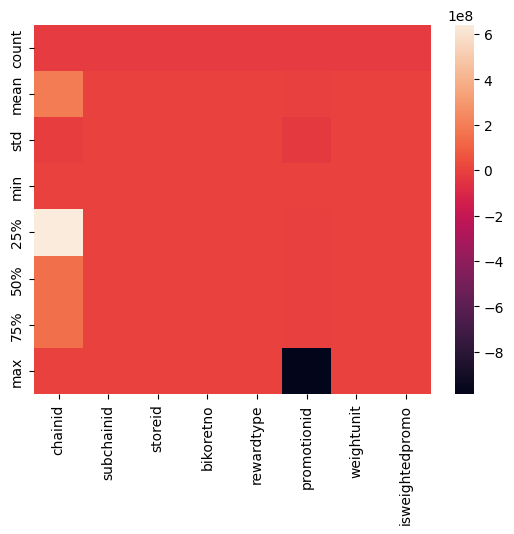

In [102]:
import seaborn as sns
sns.heatmap(df[df.isweightedpromo == 1].describe() - df[df.isweightedpromo != 1].describe())

In [69]:
# isgiftitem
df.isgiftitem.unique()

array([0, 1, '0', '1', 'not_apply'], dtype=object)

In [70]:
# seem like alot of supermarkets using 'not_apply' which mean this is a valid setup.
df[df.isgiftitem == 'not_apply'].chainid.unique() 

# theroy: [0,'not_apply'] -> giftsitems column empty
#         [1] -> giftsitems contains the gifts

array([7290058140886, 7291059100008, 7290058134977, 7290873255550,
       7290027600007, 7290058173198, 7290725900003, 7290876100000,
       7290103152017, 7290058197699, 7290058108879, 7291056200008,
       7290639000004, 7290803800003, 7290526500006, 7290058198450,
       7290058160839, 7290058159628, 7290055700014, 7290644700005,
       7290492000005, 7290700100008, 7290785400000])

In [73]:
gifts = df[df.isgiftitem.isin([1,'1'])]
gifts.giftsitems.unique()

array(['not_apply'], dtype=object)

In [76]:
gifts.sample(1).iloc[0]

file_id                       samples_promo_full/mahsani a shuk/PromoFull729...
chainid                                                           7290696200003
subchainid                                                                    0
storeid                                                                     211
bikoretno                                                                     0
priceupdatedate                                             2022-10-19 16:11:30
itemcode                                                           859966003040
isgiftitem                                                                    1
rewardtype                                                                    7
allowmultiplediscounts                                                        0
promotionid                                                              152840
promotiondetails                                                      not_apply
additionalrestrictions                  

In [77]:
not_gifts = df[df.isgiftitem.isin([0,'0'])]
not_gifts.giftsitems.unique()

array(['not_apply'], dtype=object)

In [78]:
not_gifts.sample(1).iloc[0]

file_id                       samples_promo_full/mahsani a shuk/PromoFull729...
chainid                                                           7290696200003
subchainid                                                                    0
storeid                                                                      98
bikoretno                                                                     0
priceupdatedate                                             2022-10-19 14:14:54
itemcode                                                          7290000288017
isgiftitem                                                                    0
rewardtype                                                                   10
allowmultiplediscounts                                                        0
promotionid                                                              300497
promotiondetails                                                      not_apply
additionalrestrictions                  

In [74]:
rest_gift = df[~df.isgiftitem.isin([0,1,'0','1'])]
rest_gift.giftsitems.unique()

array(['not_apply', 'NO-CONTENT',
       "[{'IsGiftItem': '1', 'ItemCode': '7290018608272', 'ItemType': '1'}, {'IsGiftItem': '1', 'ItemCode': '7290018608289', 'ItemType': '1'}, {'IsGiftItem': '1', 'ItemCode': '7290018608296', 'ItemType': '1'}, {'IsGiftItem': '1', 'ItemCode': '7290018608302', 'ItemType': '1'}, {'IsGiftItem': '1', 'ItemCode': '7290018608319', 'ItemType': '1'}, {'IsGiftItem': '1', 'ItemCode': '7290018608326', 'ItemType': '1'}, {'IsGiftItem': '1', 'ItemCode': '7290018608456', 'ItemType': '1'}, {'IsGiftItem': '1', 'ItemCode': '7290018608463', 'ItemType': '1'}, {'IsGiftItem': '1', 'ItemCode': '7290018608470', 'ItemType': '1'}]",
       "[{'IsGiftItem': '1', 'ItemCode': '7290017470436', 'ItemType': '1'}, {'IsGiftItem': '1', 'ItemCode': '7290017470443', 'ItemType': '1'}, {'IsGiftItem': '1', 'ItemCode': '7290017470610', 'ItemType': '1'}, {'IsGiftItem': '1', 'ItemCode': '7290017470627', 'ItemType': '1'}, {'IsGiftItem': '1', 'ItemCode': '7290017470634', 'ItemType': '1'}, {'IsGift

In [29]:
giftsitems_not_populated = df[df.giftsitems.isin(['not_apply','NO-CONTENT'])]

In [30]:
giftsitems_not_populated.isgiftitem.unique()

array([0, 1, '0', '1', 'not_apply'], dtype=object)

In [58]:
giftsitems_not_populated[giftsitems_not_populated.isgiftitem.isin([1,'1'])].shape#sample(1).iloc[0]

(1440, 43)

In [51]:
giftsitems_populated = df[~df.index.isin(giftsitems_not_populated.index)]

In [55]:
giftsitems_populated.giftsitems

199648    not_apply
199648    not_apply
199648    not_apply
199648    not_apply
199648    not_apply
            ...    
206661    not_apply
206661    not_apply
206661    not_apply
206783    not_apply
206830    not_apply
Name: isgiftitem, Length: 820, dtype: object

In [99]:
! pip install sweetviz


Looking in indexes: https://pypi.org/simple, https://ops0-artifactrepo1-0-prd.data.sfdc.net/artifactory/api/pypi/python-certified/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 9.5 MB/s eta 0:00:000m eta 0:00:010:00:01
  Using cached scipy-1.9.3-cp39-cp39-macosx_10_9_x86_64.whl (34.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 10.3 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.8/240.8 kB 5.2 MB/s eta 0:00:000:00:01
  Using cached Pillow-9.3.0-cp39-cp39-macosx_10_10_x86_64.whl (3.3 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.1 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
